# FIRST PART ONCOPLOT

In [48]:
#ONCOPLOT

In [1]:
!pwd

/home/fatemeh.nasrabadi/ROVIGO_congas/final


In [1]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib as mpl

import matplotlib.pyplot as plt

import warnings
import scipy
import scanpy as sc

warnings.filterwarnings("ignore")

sns.set(font_scale=1)

sns.set_style("white")

%matplotlib inline

In [50]:
#I could not find the gene list 
#Martincorena = pd.read_excel('/home/alexandra.livanova/INT/41586_2022_5202_MOESM8_ESM 1.xlsx')
#Martincorena

IntOGen = pd.read_csv("/home/fatemeh.nasrabadi/wgs_codes/2024-06-18_IntOGen-Drivers/Compendium_Cancer_Genes.tsv", sep="\t")
IntOGen
gbm_df = IntOGen[IntOGen["CANCER_TYPE"] == "GBM"]

# maf files with somatic mutations:
# sottoriva/00-PROCESSED_DATA/2023-ROVIGO/BTROHT01/BTROHT01/BTROHT01_T3/BTROHT01_T3/wgs/mutect/BTROHT01_T3.maf
# sottoriva/00-PROCESSED_DATA/2023-ROVIGO/BTROHT02/BTROHT02_T2/BTROHT02_T2/wgs/mutect/BTROHT02_T2.maf
# sottoriva/00-PROCESSED_DATA/2023-ROVIGO/BTROHT04/BTROHT04_T1/BTROHT04_T1/wgs/mutect/BTROHT04_T1.maf

In [51]:
gbm_df

,SYMBOL,TRANSCRIPT,COHORT,CANCER_TYPE,METHODS,MUTATIONS,SAMPLES,%_SAMPLES_COHORT,QVALUE_COMBINATION,ROLE,CGC_GENE,CGC_CANCER_GENE,DOMAINS,2D_CLUSTERS,3D_CLUSTERS,EXCESS_MIS,EXCESS_NON,EXCESS_SPL,IS_DRIVER,TOTAL_SAMPLES
7,ACSM3,ENST00000289416,CPTAC_WXS_GBM_2020,GBM,"oncodriveclustl,dndscv,mutpanning,hotmaps",8,6.0,0.060606,8.453493e-08,Act,False,False,NaN,584:584,584,0.997245,0.000000,0.000000,True,99
150,AR,ENST00000374690,CPTAC_WXS_GBM_2020,GBM,combination,3,3.0,0.030303,1.621198e-04,LoF,True,False,NaN,NaN,NaN,0.980785,0.997582,0.000000,True,99
236,ARID1A,ENST00000324856,ICGC_WXS_GBM_GBM_CN_2019,GBM,"oncodrivefml,cbase,mutpanning",3,3.0,0.038462,2.605582e-10,LoF,True,False,NaN,NaN,NaN,0.845585,0.995476,0.000000,True,78
430,ATRX,ENST00000373344,CPTAC_WXS_GBM_2020,GBM,cbase,10,6.0,0.060606,2.911930e-07,LoF,True,True,NaN,NaN,NaN,0.982729,0.997450,0.000000,True,99
431,ATRX,ENST00000373344,ICGC_WXS_GBM_GBM_CN_2019,GBM,"dndscv,cbase,mutpanning",8,6.0,0.076923,3.320220e-15,LoF,True,True,NaN,NaN,NaN,0.954635,0.996302,0.996302,True,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,TP53,ENST00000269305,ICGC_WXS_GBM_GBM_CN_2019,GBM,"oncodrivefml,dndscv,smregions,cbase,mutpanning...",16,11.0,0.141026,2.991083e-25,LoF,True,True,PF00870:100:288,NaN,"246,273",0.997693,0.999212,0.999212,True,78
4137,TP53,ENST00000269305,PCAWG_WGS_CNS_GBM,GBM,"dndscv,smregions,cbase,mutpanning",12,9.0,0.230769,1.985572e-12,Act,True,True,PF00870:100:288,NaN,NaN,0.993850,0.000000,0.997630,True,39
4138,TP53,ENST00000269305,TCGA_WXS_GBM,GBM,"oncodrivefml,dndscv,smregions,cbase,mutpanning...",143,110.0,0.281330,3.768336e-56,LoF,True,True,PF00870:100:288,244:250,"241,245,216,250,175,214,156,248,158,132,136,24...",0.989231,0.993672,0.993672,True,391
4353,UBXN11,ENST00000374222,ICGC_WXS_GBM_GBM_CN_2019,GBM,"oncodriveclustl,mutpanning",5,5.0,0.064103,4.239778e-07,Act,False,False,NaN,504:504,NaN,0.978326,0.000000,0.000000,True,78


In [52]:
import pandas as pd

def process_maf_for_mafinal(maf_path, patient_name):
    """
    Replicates your first block:
    BTROHT01_mafinal-style filtering (with Variant_Classification filter).
    """
    maf_df_tissue = pd.read_csv(
        maf_path,
        sep='\t',
        comment='#',
        low_memory=False
    )

    # VAFs
    maf_df_tissue['Tumor_VAF']  = maf_df_tissue['t_alt_count'] / maf_df_tissue['t_depth']
    maf_df_tissue['Normal_VAF'] = maf_df_tissue['n_alt_count'] / maf_df_tissue['n_depth']

    # Filters
    maf_df_tissue = maf_df_tissue[maf_df_tissue['FILTER'] == 'PASS']
    maf_df_tissue = maf_df_tissue[maf_df_tissue['t_depth'] > 10]
    maf_df_tissue = maf_df_tissue[maf_df_tissue['n_depth'] > 10]
    maf_df_tissue = maf_df_tissue[maf_df_tissue['t_alt_count'] >= 3]
    maf_df_tissue = maf_df_tissue[maf_df_tissue['n_alt_count'] == 0]
    maf_df_tissue = maf_df_tissue[maf_df_tissue['Tumor_VAF'] > 0.05]

    # Variant classification filter
    maf_df_tissue = maf_df_tissue[
        maf_df_tissue['Variant_Classification'].isin([
            'In_Frame_Ins', 'In_Frame_Del',
            'Missense_Mutation',
            'Frame_Shift_Ins',
            'Frame_Shift_Del',
            'Nonsense_Mutation',
            'Nonstop_Mutation',
            'Translation_Start_Site',
            'Splice_Site',
            "5'Flank", "5'UTR"
        ])
    ]

    # Patient
    maf_df_tissue['Patient'] = patient_name

    return maf_df_tissue   # this is your *..._mafinal*


In [53]:
def process_maf_for_tmb(maf_path, patient_name):
    """
    Replicates your second block:
    BT1-style TMB filtration (no Variant_Classification restriction).
    """
    maf_df_tissue = pd.read_csv(
        maf_path,
        sep='\t',
        comment='#',
        low_memory=False
    )

    # VAFs
    maf_df_tissue['Tumor_VAF']  = maf_df_tissue['t_alt_count'] / maf_df_tissue['t_depth']
    maf_df_tissue['Normal_VAF'] = maf_df_tissue['n_alt_count'] / maf_df_tissue['n_depth']

    # Filters (same as your code)
    maf_df_tissue = maf_df_tissue[maf_df_tissue['FILTER'] == 'PASS']
    maf_df_tissue = maf_df_tissue[maf_df_tissue['t_depth'] > 10]
    maf_df_tissue = maf_df_tissue[maf_df_tissue['n_depth'] > 10]
    maf_df_tissue = maf_df_tissue[maf_df_tissue['t_alt_count'] >= 3]
    maf_df_tissue = maf_df_tissue[maf_df_tissue['n_alt_count'] == 0]

    maf_final = maf_df_tissue.copy()
    maf_final = maf_final[maf_final['Tumor_VAF'] > 0.05]
    maf_final = maf_final[(maf_final['t_alt_count'] * maf_final['Tumor_VAF']) > 2]

    maf_final['Patient'] = patient_name

    return maf_final       # this is your *BT1*


In [54]:
samples = {
    "BTROHT01": '/group/sottoriva/00-PROCESSED_DATA/2023-ROVIGO/BTROHT01/BTROHT01/BTROHT01_T3/wgs/mutect/BTROHT01_T3.maf',
    "BTROHT02": '/group/sottoriva/00-PROCESSED_DATA/2023-ROVIGO/BTROHT02/BTROHT02/BTROHT02_T/BTROHT02_T2/BTROHT02_T2/wgs/mutect/BTROHT02_T2.maf',
    "BTROHT04": '/group/sottoriva/00-PROCESSED_DATA/2023-ROVIGO/BTROHT04/BTROHT04/BTROHT04_T/BTROHT04_T1/BTROHT04_T1/wgs/mutect/BTROHT04_T1.maf',
    "BTROHT03": '/group/sottoriva/00-PROCESSED_DATA/2023-ROVIGO/BTROHT03/BTROHT03/BTROHT03_T/BTROHT03_T1/wgs/mutect/BTROHT03_T1.maf',
    "BTROHT06": '/group/sottoriva/00-PROCESSED_DATA/2023-ROVIGO/BTROHT06/BTROHT06/BTROHT06_T/BTROHT06_T5/wgs/mutect/BTROHT06_T5.maf'
}


In [55]:
#i edited the path to maf files

In [56]:
mafinal_dict = {}   # equivalent of BTROHTxx_mafinal for each sample
tmb_dict     = {}   # equivalent of BTxx (TMB) for each sample

for patient, path in samples.items():
    mafinal_dict[patient] = process_maf_for_mafinal(path, patient_name=patient)
    tmb_dict[patient]     = process_maf_for_tmb(path, patient_name=patient)


In [57]:
BTROHT01_mafinal = mafinal_dict["BTROHT01"]
BTROHT01_BT1     = tmb_dict["BTROHT01"]

BTROHT02_mafinal = mafinal_dict["BTROHT02"]
BTROHT02_BT1     = tmb_dict["BTROHT02"]

BTROHT03_mafinal = mafinal_dict["BTROHT03"]
BTROHT03_BT1     = tmb_dict["BTROHT03"]

BTROHT04_mafinal = mafinal_dict["BTROHT04"]
BTROHT04_BT1     = tmb_dict["BTROHT04"]

BTROHT06_mafinal = mafinal_dict["BTROHT06"]
BTROHT06_BT1     = tmb_dict["BTROHT06"]


In [58]:
import pandas as pd

# Assuming you have the two dataframes
# BTROHT06_mafinal and BTROHT03_mafinal

# Add a 'sample_name' column to each dataframe
BTROHT01_BT1['sample_name'] = 'BTROHT06'
BTROHT02_BT1['sample_name'] = 'BTROHT03'
BTROHT03_BT1['sample_name'] = 'BTROHT01'
BTROHT04_BT1['sample_name'] = 'BTROHT02'
BTROHT06_BT1['sample_name'] = 'BTROHT04'

# Merge the two dataframes (assuming they have the same structure)
merged_df_TMB = pd.concat([BTROHT01_BT1, BTROHT02_BT1, BTROHT03_BT1,BTROHT04_BT1, BTROHT06_BT1], ignore_index=True)
#

In [59]:
# Number of mutations per patient
patient_row_counts = merged_df_TMB['Patient'].value_counts().reset_index()
patient_row_counts.columns = ['Patient', 'Mutation_Count']

# Compute TMB: mutations per Mb of genome
patient_row_counts['TMB'] = patient_row_counts['Mutation_Count'] / 3000
patient_row_counts


,Patient,Mutation_Count,TMB
0,BTROHT01,8362,2.787333
1,BTROHT06,6977,2.325667
2,BTROHT04,6515,2.171667
3,BTROHT02,5707,1.902333
4,BTROHT03,3988,1.329333


In [60]:
import pandas as pd

# 1) Count total number of variants per patient
variants_per_patient = (
    merged_df_TMB
    .groupby('Patient')
    .size()                         # number of variants
    .rename('Variant_Count')
)

# 2) Compute TMB = total variants / 3000 (assuming 3000 Mb)
tmb_per_patient = (variants_per_patient / 3000).rename('TMB')

# 3) Put into a clean DataFrame
tmb_table = pd.concat([variants_per_patient, tmb_per_patient], axis=1)

print(tmb_table)


          Variant_Count       TMB
Patient                          
BTROHT01           8362  2.787333
BTROHT02           5707  1.902333
BTROHT03           3988  1.329333
BTROHT04           6515  2.171667
BTROHT06           6977  2.325667


In [61]:
import pandas as pd

# Assuming you have the two dataframes
# BTROHT06_mafinal and BTROHT03_mafinal

# Add a 'sample_name' column to each dataframe
BTROHT06_mafinal['sample_name'] = 'BTROHT06'
BTROHT03_mafinal['sample_name'] = 'BTROHT03'
BTROHT01_mafinal['sample_name'] = 'BTROHT01'
BTROHT02_mafinal['sample_name'] = 'BTROHT02'
BTROHT04_mafinal['sample_name'] = 'BTROHT04'

# Merge the two dataframes (assuming they have the same structure)
merged_df = pd.concat([BTROHT04_mafinal, BTROHT01_mafinal, BTROHT02_mafinal,BTROHT06_mafinal, BTROHT03_mafinal], ignore_index=True)
#

In [62]:
merged_df

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,MAPPABILITY,Tumor_VAF,Normal_VAF,Patient,sample_name
0,LINC01409,0,.,GRCh38,chr1,777985,777985,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,777985,1.00,0.061224,0.0,BTROHT04,BTROHT04
1,AGRN,0,.,GRCh38,chr1,1019428,1019428,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,1019428,1.00,0.051724,0.0,BTROHT04,BTROHT04
2,ATAD3A,0,.,GRCh38,chr1,1509114,1509114,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,1509114,0.45,0.304348,0.0,BTROHT04,BTROHT04
3,ENST00000442483,0,.,GRCh38,chr1,2210572,2210572,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,2210572,1.00,0.062500,0.0,BTROHT04,BTROHT04
4,MMEL1,0,.,GRCh38,chr1,2593928,2593928,+,Missense_Mutation,SNP,...,NaN,NaN,NaN,NaN,2593928,1.00,0.276596,0.0,BTROHT04,BTROHT04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,CDC27P2,0,.,GRCh38,chrY,10196467,10196467,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,10196467,NaN,0.088235,0.0,BTROHT03,BTROHT03
8637,CDRT15P10,0,.,GRCh38,chrY,11088990,11088990,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,11088990,NaN,0.073394,0.0,BTROHT03,BTROHT03
8638,DUX4L18,0,.,GRCh38,chrY,11320227,11320227,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,11320227,NaN,0.098361,0.0,BTROHT03,BTROHT03
8639,SLC9B1P1,0,.,GRCh38,chrY,11387665,11387665,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,11387665,NaN,0.222222,0.0,BTROHT03,BTROHT03


In [63]:
# Count in how many unique patients each gene appears
patient_counts = (
    merged_df.groupby('Hugo_Symbol')['Patient']
    .nunique()
    .reset_index(name='Patient_Count')
)

# Merge back to your original dataframe
merged_df = merged_df.merge(
    patient_counts,
    on='Hugo_Symbol',
    how='left'
)


In [64]:
merged_df[merged_df['Hugo_Symbol'] == "TP53"]

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,MAPPABILITY,Tumor_VAF,Normal_VAF,Patient,sample_name,Patient_Count
523,TP53,0,.,GRCh38,chr17,7675232,7675232,+,Missense_Mutation,SNP,...,NaN,NaN,NaN,7675232,1.0,0.546875,0.0,BTROHT04,BTROHT04,2
2198,TP53,0,.,GRCh38,chr17,7676399,7676399,+,Missense_Mutation,SNP,...,NaN,NaN,NaN,7676399,1.0,0.443038,0.0,BTROHT01,BTROHT01,2


In [65]:
merged_df_sorted = merged_df.sort_values(
    by='Patient_Count',
    ascending=False
)


In [66]:
merged_df_sorted

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,MAPPABILITY,Tumor_VAF,Normal_VAF,Patient,sample_name,Patient_Count
3482,PABPC1P12,0,.,GRCh38,chr10,38631038,38631038,+,5'Flank,SNP,...,NaN,NaN,NaN,38631038,1.00,0.129032,0.0,BTROHT02,BTROHT02,5
531,ENST00000637164,0,.,GRCh38,chr17,21786259,21786259,+,5'Flank,SNP,...,NaN,NaN,NaN,21786259,1.00,0.126984,0.0,BTROHT04,BTROHT04,5
7858,Metazoa_SRP,0,.,GRCh38,chr2,46263825,46263826,+,5'Flank,INS,...,NaN,NaN,NaN,46263825,1.00,0.050847,0.0,BTROHT03,BTROHT03,5
7853,Y_RNA,0,.,GRCh38,chr2,28975418,28975418,+,5'Flank,SNP,...,NaN,NaN,NaN,28975418,1.00,0.105263,0.0,BTROHT03,BTROHT03,5
7898,Y_RNA,0,.,GRCh38,chr2,120187592,120187592,+,5'Flank,SNP,...,NaN,NaN,NaN,120187592,0.79,0.125000,0.0,BTROHT03,BTROHT03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,FNDC5,0,.,GRCh38,chr1,32874007,32874007,+,5'Flank,SNP,...,NaN,NaN,NaN,32874007,1.00,0.065217,0.0,BTROHT04,BTROHT04,1
28,ENST00000641402,0,.,GRCh38,chr1,35149938,35149938,+,5'Flank,SNP,...,NaN,NaN,NaN,35149938,1.00,0.108108,0.0,BTROHT04,BTROHT04,1
29,C1orf216,0,.,GRCh38,chr1,35723165,35723165,+,5'Flank,SNP,...,NaN,NaN,NaN,35723165,1.00,0.062500,0.0,BTROHT04,BTROHT04,1
30,SLC6A9,0,.,GRCh38,chr1,44033399,44033399,+,5'Flank,SNP,...,NaN,NaN,NaN,44033399,1.00,0.217949,0.0,BTROHT04,BTROHT04,1


In [67]:
merged_df_sorted[merged_df_sorted['Hugo_Symbol'] == "PABPC1P12"]

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,MAPPABILITY,Tumor_VAF,Normal_VAF,Patient,sample_name,Patient_Count
3482,PABPC1P12,0,.,GRCh38,chr10,38631038,38631038,+,5'Flank,SNP,...,NaN,NaN,NaN,38631038,1.00,0.129032,0.0,BTROHT02,BTROHT02,5
133,PABPC1P12,0,.,GRCh38,chr10,38633706,38633706,+,5'Flank,SNP,...,NaN,NaN,NaN,38633706,0.93,0.119048,0.0,BTROHT04,BTROHT04,5
1772,PABPC1P12,0,.,GRCh38,chr10,38635806,38635806,+,5'Flank,SNP,...,NaN,NaN,NaN,38635806,1.00,0.061538,0.0,BTROHT01,BTROHT01,5
5298,PABPC1P12,0,.,GRCh38,chr10,38634864,38634864,+,5'Flank,SNP,...,NaN,NaN,NaN,38634864,0.21,0.166667,0.0,BTROHT06,BTROHT06,5
1771,PABPC1P12,0,.,GRCh38,chr10,38635801,38635801,+,5'Flank,SNP,...,NaN,NaN,NaN,38635801,1.00,0.088235,0.0,BTROHT01,BTROHT01,5
7210,PABPC1P12,0,.,GRCh38,chr10,38633706,38633706,+,5'Flank,SNP,...,NaN,NaN,NaN,38633706,0.93,0.137931,0.0,BTROHT03,BTROHT03,5


In [68]:
gbm_df[gbm_df['SYMBOL'] == "PABPC1P12"]

,SYMBOL,TRANSCRIPT,COHORT,CANCER_TYPE,METHODS,MUTATIONS,SAMPLES,%_SAMPLES_COHORT,QVALUE_COMBINATION,ROLE,CGC_GENE,CGC_CANCER_GENE,DOMAINS,2D_CLUSTERS,3D_CLUSTERS,EXCESS_MIS,EXCESS_NON,EXCESS_SPL,IS_DRIVER,TOTAL_SAMPLES


In [69]:
gbm_df

,SYMBOL,TRANSCRIPT,COHORT,CANCER_TYPE,METHODS,MUTATIONS,SAMPLES,%_SAMPLES_COHORT,QVALUE_COMBINATION,ROLE,CGC_GENE,CGC_CANCER_GENE,DOMAINS,2D_CLUSTERS,3D_CLUSTERS,EXCESS_MIS,EXCESS_NON,EXCESS_SPL,IS_DRIVER,TOTAL_SAMPLES
7,ACSM3,ENST00000289416,CPTAC_WXS_GBM_2020,GBM,"oncodriveclustl,dndscv,mutpanning,hotmaps",8,6.0,0.060606,8.453493e-08,Act,False,False,NaN,584:584,584,0.997245,0.000000,0.000000,True,99
150,AR,ENST00000374690,CPTAC_WXS_GBM_2020,GBM,combination,3,3.0,0.030303,1.621198e-04,LoF,True,False,NaN,NaN,NaN,0.980785,0.997582,0.000000,True,99
236,ARID1A,ENST00000324856,ICGC_WXS_GBM_GBM_CN_2019,GBM,"oncodrivefml,cbase,mutpanning",3,3.0,0.038462,2.605582e-10,LoF,True,False,NaN,NaN,NaN,0.845585,0.995476,0.000000,True,78
430,ATRX,ENST00000373344,CPTAC_WXS_GBM_2020,GBM,cbase,10,6.0,0.060606,2.911930e-07,LoF,True,True,NaN,NaN,NaN,0.982729,0.997450,0.000000,True,99
431,ATRX,ENST00000373344,ICGC_WXS_GBM_GBM_CN_2019,GBM,"dndscv,cbase,mutpanning",8,6.0,0.076923,3.320220e-15,LoF,True,True,NaN,NaN,NaN,0.954635,0.996302,0.996302,True,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,TP53,ENST00000269305,ICGC_WXS_GBM_GBM_CN_2019,GBM,"oncodrivefml,dndscv,smregions,cbase,mutpanning...",16,11.0,0.141026,2.991083e-25,LoF,True,True,PF00870:100:288,NaN,"246,273",0.997693,0.999212,0.999212,True,78
4137,TP53,ENST00000269305,PCAWG_WGS_CNS_GBM,GBM,"dndscv,smregions,cbase,mutpanning",12,9.0,0.230769,1.985572e-12,Act,True,True,PF00870:100:288,NaN,NaN,0.993850,0.000000,0.997630,True,39
4138,TP53,ENST00000269305,TCGA_WXS_GBM,GBM,"oncodrivefml,dndscv,smregions,cbase,mutpanning...",143,110.0,0.281330,3.768336e-56,LoF,True,True,PF00870:100:288,244:250,"241,245,216,250,175,214,156,248,158,132,136,24...",0.989231,0.993672,0.993672,True,391
4353,UBXN11,ENST00000374222,ICGC_WXS_GBM_GBM_CN_2019,GBM,"oncodriveclustl,mutpanning",5,5.0,0.064103,4.239778e-07,Act,False,False,NaN,504:504,NaN,0.978326,0.000000,0.000000,True,78


In [70]:
# Filter merged_df to keep only rows where Hugo_Symbol is in IntOGen's SYMBOL column
filtered_merged_df = merged_df[merged_df['Hugo_Symbol'].isin(IntOGen['SYMBOL'])]

# Display the filtered dataframe

In [71]:
IntOGen

,SYMBOL,TRANSCRIPT,COHORT,CANCER_TYPE,METHODS,MUTATIONS,SAMPLES,%_SAMPLES_COHORT,QVALUE_COMBINATION,ROLE,CGC_GENE,CGC_CANCER_GENE,DOMAINS,2D_CLUSTERS,3D_CLUSTERS,EXCESS_MIS,EXCESS_NON,EXCESS_SPL,IS_DRIVER,TOTAL_SAMPLES
0,ABCC4,ENST00000645237,CBIOP_WXS_ANGS_UNTREAT_2020,ANGS,"oncodriveclustl,hotmaps",4,4.0,0.117647,0.000018,Act,False,False,NaN,1250:1250,NaN,0.946467,0.000000,0.000000,True,34
1,ABL1,ENST00000318560,TCGA_WXS_UCEC,UCEC,combination,13,10.0,0.019417,0.001108,LoF,True,False,NaN,NaN,NaN,0.563510,0.770317,0.000000,True,515
2,ABL2,ENST00000502732,TCGA_WXS_BRCA,BRCA,combination,12,10.0,0.009911,0.011201,Act,True,False,NaN,NaN,NaN,0.555686,0.000000,0.000000,True,1009
3,ABL2,ENST00000502732,TCGA_WXS_UCEC,UCEC,combination,13,12.0,0.023301,0.343937,Act,True,False,NaN,NaN,NaN,0.252377,0.000000,0.000000,True,515
4,ACKR3,ENST00000272928,TCGA_WXS_OVT,OVT,combination,6,4.0,0.009780,0.192002,Act,True,False,NaN,NaN,NaN,0.844421,0.000000,0.000000,True,409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,ZNF90,ENST00000418063,OTHER_WXS_NPC_NATCOM2017,NPC,"oncodriveclustl,dndscv",11,7.0,0.067961,0.001642,Act,False,False,NaN,503:507,NaN,0.947187,0.000000,0.000000,True,103
4474,ZNF93,ENST00000343769,OTHER_WXS_NPC_NATCOM2017,NPC,"oncodriveclustl,dndscv,mutpanning",18,14.0,0.135922,0.001702,Act,False,False,NaN,533:533,NaN,0.932165,0.000000,0.000000,True,103
4475,ZNRF3,ENST00000544604,TCGA_WXS_ACC,ACC,combination,6,4.0,0.043956,0.000004,LoF,True,True,NaN,NaN,NaN,0.690034,0.990599,0.990599,True,91
4476,ZRSR2,ENST00000307771,OTHER_WXS_AML_PRY_BEAT_2018,AML,combination,4,3.0,0.011673,0.001005,LoF,True,False,NaN,NaN,NaN,0.000000,0.985851,0.985851,True,257


In [72]:
# extra genes to include
extra_genes = [
    'TERT', 'SPTA1', 'GABRA6', 'CDH18', 'SEMA3C', 'COL1A2',
    'ABCC9', 'NLRP5', 'DRD5', 'TCHH', 'SCN9A', 'IDH1',
    "ATR","KMT2C","TERT","CHEK2","TP53","IDH1","RAD50","ATRX","NF1",
    "PIK3R1","MUTYH","MRE11","AR","ARID1B","CIC","DNMT3A","ERBB2","FGF6",
    "FOXL2","PHF6","PIK3CA","POLE","PRKDC","PTEN","RB1","TET2"
]


# combine IntOGen genes with your extra genes
combined_genes = list(IntOGen['SYMBOL'].unique()) + extra_genes

# filter merged_df using combined gene list
filtered_merged_df = merged_df[ merged_df['Hugo_Symbol'].isin(combined_genes) ]

# show the result
filtered_merged_df


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,MAPPABILITY,Tumor_VAF,Normal_VAF,Patient,sample_name,Patient_Count
158,TCF7L2,0,.,GRCh38,chr10,112950544,112950544,+,5'UTR,SNP,...,NaN,NaN,NaN,112950544,1.0,0.176471,0.0,BTROHT04,BTROHT04,1
248,ARHGEF12,0,.,GRCh38,chr11,120449179,120449179,+,Missense_Mutation,SNP,...,NaN,NaN,NaN,120449179,1.0,0.133333,0.0,BTROHT04,BTROHT04,1
260,FGF6,0,.,GRCh38,chr12,4446331,4446331,+,5'Flank,SNP,...,NaN,NaN,NaN,4446331,1.0,0.097561,0.0,BTROHT04,BTROHT04,1
292,ARID2,0,.,GRCh38,chr12,45728377,45728380,+,5'Flank,DEL,...,NaN,NaN,NaN,45728376,1.0,0.363636,0.0,BTROHT04,BTROHT04,1
295,KMT2D,0,.,GRCh38,chr12,49064607,49064607,+,5'Flank,SNP,...,NaN,NaN,NaN,49064607,1.0,0.102564,0.0,BTROHT04,BTROHT04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,FOXO3,0,.,GRCh38,chr6,108558541,108558541,+,5'Flank,SNP,...,NaN,NaN,NaN,108558541,1.0,0.157895,0.0,BTROHT03,BTROHT03,1
8472,NRG1,0,.,GRCh38,chr8,31637407,31637407,+,5'Flank,SNP,...,NaN,NaN,NaN,31637407,1.0,0.518519,0.0,BTROHT03,BTROHT03,2
8510,PTPRD,0,.,GRCh38,chr9,8486103,8486104,+,In_Frame_Ins,INS,...,NaN,NaN,NaN,8486103,1.0,0.116279,0.0,BTROHT03,BTROHT03,1
8513,PSIP1,0,.,GRCh38,chr9,15468999,15468999,+,Missense_Mutation,SNP,...,NaN,NaN,NaN,15468999,1.0,0.055556,0.0,BTROHT03,BTROHT03,1


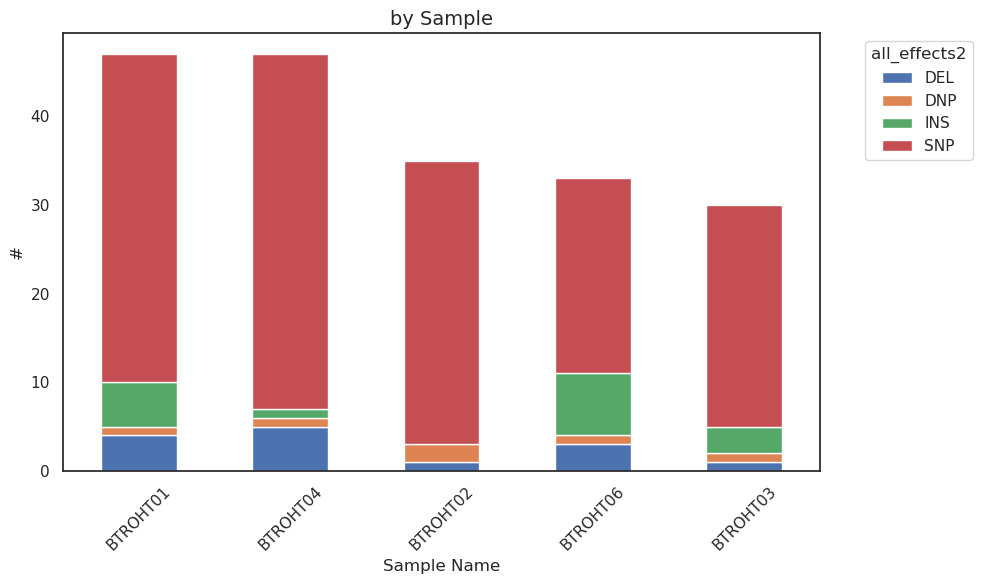

In [73]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in 'all_effects2' grouped by 'sample_name'
effect_counts = filtered_merged_df.groupby('sample_name')['Variant_Type'].value_counts().unstack(fill_value=0)

# Sort the effect counts by the total count across all categories for each sample
effect_counts = effect_counts.loc[effect_counts.sum(axis=1).sort_values(ascending=False).index]

# Plot the bar chart
effect_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('by Sample', fontsize=14)
plt.xlabel('Sample Name', fontsize=12)
plt.ylabel('#', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the legend to be outside of the plot
plt.legend(title='all_effects2', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [74]:
gbm_df["SYMBOL"]

7        ACSM3
150         AR
236     ARID1A
430       ATRX
431       ATRX
         ...  
4136      TP53
4137      TP53
4138      TP53
4353    UBXN11
4407      ZEB1
Name: SYMBOL, Length: 76, dtype: object

In [75]:
# Count in how many unique patients each gene appears
patient_counts = (
    filtered_merged_df.groupby('Hugo_Symbol')['Patient']
    .nunique()
    .reset_index(name='Patient_Count')
)

# Merge back to your original dataframe
filtered_merged_df = filtered_merged_df.merge(
    patient_counts,
    on='Hugo_Symbol',
    how='left'
)


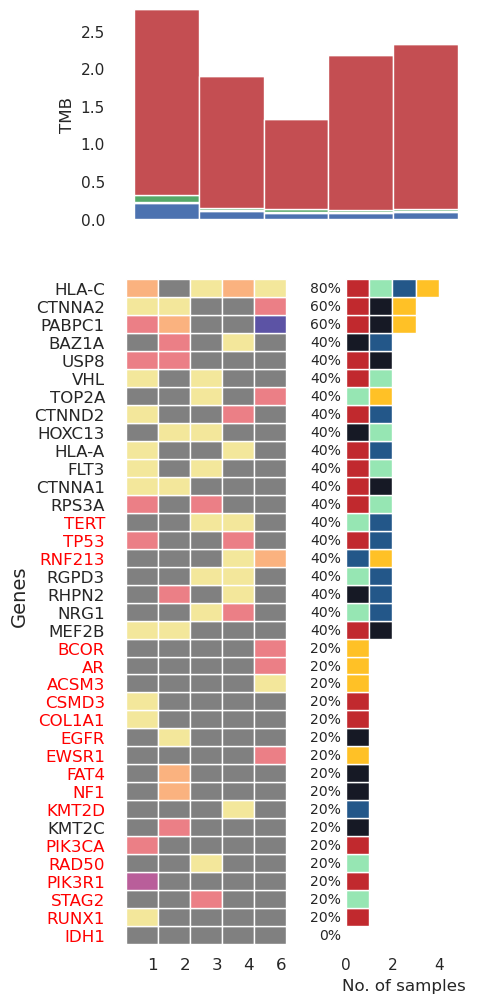

In [76]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ========= Colors for oncoplot =========
effect_colors_updated = {
    '5\'Flank': '#f3e79b',            # Light Yellow
    'Intron': '#fab27f',              # Peach
    'Missense_Mutation': '#eb7f86',   # Pink
    'Nonsense_Mutation': '#b95e9a',   # Lavender
    'Silent': '#5c53a5',              # Purple
    'Multi_Hit': '#fab27f',           # Same as Intron here
    'no_effect': 'gray',              # Gray for no effect
    'In_Frame_Ins': '#5c53a5'
}

# ========= Colors per patient (for right-side bar) =========
patient_colors = {
    "BTROHT03": "#96e6b3",  # Mint Green
    "BTROHT04": "#235789",  # Steel Blue
    "BTROHT06": "#ffc126",  # Golden Yellow
    "BTROHT01": "#c1292e",  # Warm Red
    "BTROHT02": "#161925"   # Deep Navy
}


# ========= Selected genes (manually added) =========
selected_genes = ['KMT2C', 'TERT', 'TP53', 'IDH1']

# ========= GBM driver genes list (from gbm_df) =========
gbm_driver_genes = list(gbm_df['SYMBOL'].unique())

# ========================
# 1) Select top 20 genes by Patient_Count
# ========================
top20_genes = (
    filtered_merged_df 
    .groupby('Hugo_Symbol')['Patient']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# ========================
# 2) Combine: top20 + selected_genes + GBM driver genes
# ========================
combined_genes = sorted(
    set(selected_genes) |
    set(top20_genes) |
    set(gbm_driver_genes)
)

# Filter MAF data to include only these genes
filtered_selected_genes_df = filtered_merged_df [
    filtered_merged_df['Hugo_Symbol'].isin(combined_genes)
]

# ========= Multi-hit helper =========
def determine_effect(x):
    unique_effects = x.dropna().unique()
    if len(unique_effects) == 0:
        return 'no_effect'
    if len(unique_effects) > 1:
        return 'Multi_Hit'
    return unique_effects[0]

# 2) Determine the predominant effect per gene per sample
effects_per_gene_sample_updated = (
    filtered_selected_genes_df
    .groupby(['Hugo_Symbol', 'sample_name'])['Variant_Classification']
    .apply(determine_effect)
    .unstack(fill_value='no_effect')
)

# 3) Count mutated samples per gene and sort genes by how many patients carry them
mutation_count_per_gene = (
    filtered_selected_genes_df
    .groupby('Hugo_Symbol')['sample_name']
    .nunique()
)

# Only genes with ≥1 mutated sample are present here
sorted_genes = (
    mutation_count_per_gene
    .sort_values(ascending=False)      # most shared genes first
    .index
)

# --- ALWAYS show IDH1 even if not mutated ---
sorted_genes = sorted_genes.tolist()
if "IDH1" not in sorted_genes:
    sorted_genes.append("IDH1")

# 4) Build mutation matrix for these genes
#    Use reindex so that if IDH1 is missing, a full 'no_effect' row is created.
effect_matrix_updated = effects_per_gene_sample_updated.reindex(
    sorted_genes
).fillna('no_effect')

# Flip so most-shared genes are visually on top
effect_matrix_updated = effect_matrix_updated.iloc[::-1]

# ========================
# TMB per patient, colored by Variant_Type
# ========================
mutation_counts = (
    merged_df_TMB
    .groupby(['Patient', 'Variant_Type'])
    .size()
    .reset_index(name='Count')
)

mutation_counts['TMB'] = mutation_counts['Count'] / 3000

tmb_pivot = mutation_counts.pivot_table(
    index='Patient',
    columns='Variant_Type',
    values='TMB',
    fill_value=0
)

# Align patient order with oncoplot samples
samples_order = list(effect_matrix_updated.columns)
tmb_pivot = tmb_pivot.reindex(samples_order).fillna(0)

# ========================
# Combined figure: top TMB barplot, bottom oncoplot
# ========================
fig, (ax_tmb, ax_onco) = plt.subplots(
    2, 1,
    figsize=(5,12),
    gridspec_kw={'height_ratios': [1.2, 4]},
    sharex=True
)

x_positions = np.arange(len(tmb_pivot.index))

# -------- Top panel: stacked TMB barplot --------
bottom_vals = np.zeros(len(tmb_pivot))

for variant in tmb_pivot.columns:
    ax_tmb.bar(
        x_positions,
        tmb_pivot[variant].values,
        bottom=bottom_vals,
        width=1,                 # same width as oncoplot columns
        label=variant
    )
    bottom_vals += tmb_pivot[variant].values

ax_tmb.set_ylabel("TMB", fontsize=12)
ax_tmb.set_title("", fontsize=13)
ax_tmb.tick_params(axis='x', labelbottom=False)

# Remove box (spines) around TMB axis
for spine in ax_tmb.spines.values():
    spine.set_visible(False)

# -------- Bottom panel: Oncoplot --------
for i, gene in enumerate(effect_matrix_updated.index):
    for j, sample in enumerate(effect_matrix_updated.columns):
        effect_type = effect_matrix_updated.loc[gene, sample]
        ax_onco.bar(
            j, 1,
            bottom=i,
            color=effect_colors_updated.get(effect_type, 'gray'),
            width=1
        )

ax_onco.set_ylabel('Genes', fontsize=14)
ax_onco.set_xlabel('', fontsize=10)
ax_onco.set_title('', fontsize=16)

# Y ticks: one per gene, centered
ax_onco.set_yticks(np.arange(len(effect_matrix_updated.index)) + 0.5)
ax_onco.set_yticklabels(effect_matrix_updated.index, fontsize=12)

# === Highlight ONLY genes from IntOGen driver list in RED ===
gbm_driver_genes = set(gbm_df["SYMBOL"].unique())

# Highlight IntOGen driver genes + TERT in red
gbm_driver_genes = set(gbm_df["SYMBOL"].unique())

for label in ax_onco.get_yticklabels():
    gene = label.get_text()
    if gene in gbm_driver_genes or gene == "TERT":
        label.set_color('red')
           # optional


# X ticks: center labels under each patient/sample
tick_positions = x_positions + 0.5
ax_onco.set_xticks(tick_positions)
# === Custom patient numbering (skip 5) ===
custom_labels = [1, 2, 3, 4, 6]   # <-- your desired labels

# Use these instead of sample names
ax_onco.set_xticklabels(custom_labels, rotation=0, ha="right", fontsize=12)

# Remove box (spines) around oncoplot axis
for spine in ax_onco.spines.values():
    spine.set_visible(False)

# ===== Legends at the bottom (no frames) =====

# # Legend for Variant_Type (TMB)
# leg1 = ax_tmb.legend(
#     title="Variant Type",
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.25),
#     ncol=3,
#     frameon=False,
#     fontsize=12
# )


# ======================================================
# NEW PART: right-side bar showing No. of samples / % per gene
# ======================================================

# Boolean matrix: mutated or not (anything != no_effect)
mutated_bool = (effect_matrix_updated != 'no_effect')
n_genes, n_samples = mutated_bool.shape

# Count how many samples have mutation for each gene
gene_sample_counts = mutated_bool.sum(axis=1)  # index aligned with effect_matrix_updated.index

# Create new axis to the right of the oncoplot
divider = make_axes_locatable(ax_onco)
ax_right = divider.append_axes("right", size=1.4, pad=0.4)

y_positions = np.arange(len(effect_matrix_updated.index)) + 0.5

for i, gene in enumerate(effect_matrix_updated.index):
    left = 0
    # one slice per patient with that gene mutated
    for j, patient in enumerate(samples_order):
        if mutated_bool.iloc[i, j]:
            ax_right.barh(
                y_positions[i],
                1,                      # one unit per patient
                left=left,
                color=patient_colors.get(patient, "lightgray"),
                height=1
            )
            left += 1

    # percentage label
    pct = (gene_sample_counts.iloc[i] / n_samples) * 100
    ax_right.text(
        -0.2, y_positions[i],
        f"{pct:.0f}%",
        va='center', ha='right',
        fontsize=10
    )

ax_right.set_ylim(ax_onco.get_ylim())
ax_right.set_xlim(-0.5, n_samples + 0.5)
ax_right.set_yticks([])  # don't repeat gene names
ax_right.set_xlabel("No. of samples", fontsize=12)

for spine in ax_right.spines.values():
    spine.set_visible(False)

# # Legend for Variant Classification (oncoplot)
# legend_order = ["5'Flank", "Missense_Mutation", "Nonsense_Mutation", "Multi_Hit", "no_effect"]
# legend_labels = [
#     Patch(color=effect_colors_updated[key], label=key)
#     for key in legend_order
# ]

# leg2 = ax_onco.legend(
#     handles=legend_labels,
#     title="Variant Classification",
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.20),
#     ncol=3,
#     frameon=False,
#     fontsize=12
# )

plt.tight_layout(rect=[0, 0.15, 1, 1])
plt.show()


In [77]:
#ADD top pannel

In [78]:
import pandas as pd
BT_pp_all = pd.read_csv("/home/fatemeh.nasrabadi/wgs_codes/BT_pp_all.tsv", sep='\t')

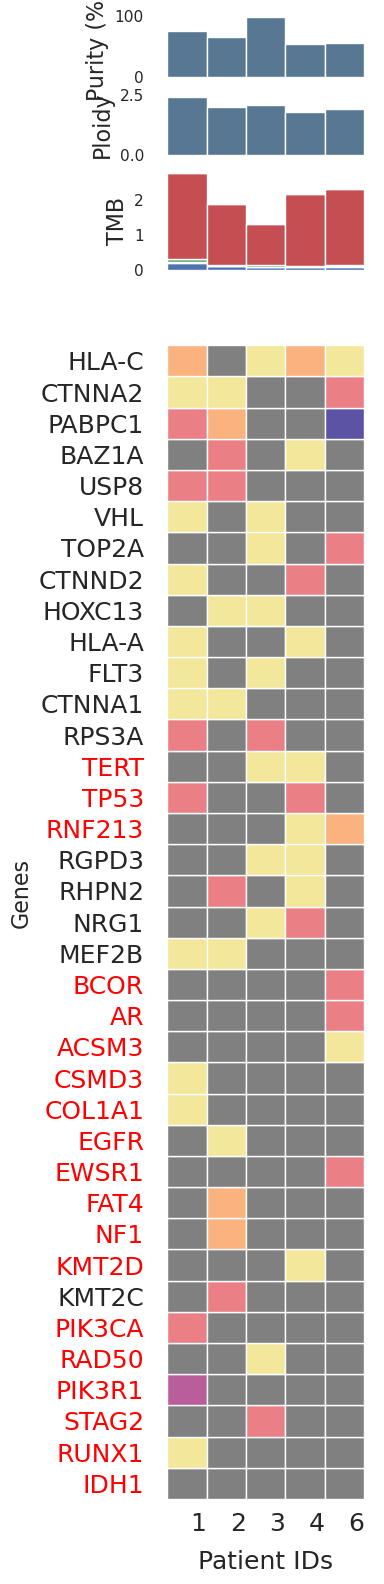

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# ========= Colors for oncoplot =========
effect_colors_updated = {
    '5\'Flank': '#f3e79b',            # Light Yellow
    'Intron': '#fab27f',              # Peach
    'Missense_Mutation': '#eb7f86',   # Pink
    'Nonsense_Mutation': '#b95e9a',   # Lavender
    'Silent': '#5c53a5',              # Purple
    'Multi_Hit': '#fab27f',           # Same as Intron here
    'no_effect': 'gray',              # Gray for no effect
    'In_Frame_Ins': '#5c53a5'
}

# =========  Selected genes (manually added) =========
selected_genes = ['KMT2C', 'TERT', 'TP53', 'IDH1']

# ========= GBM driver genes list (from gbm_df) =========
gbm_driver_genes = list(gbm_df['SYMBOL'].unique())

# ========================
# 1) Select top 20 genes by Patient_Count
# ========================
top20_genes = (
    filtered_merged_df
    .groupby('Hugo_Symbol')['Patient']
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# ========================
# 2) Combine: top20 + selected_genes + GBM driver genes
# ========================
combined_genes = sorted(
    set(selected_genes) |
    set(top20_genes) |
    set(gbm_driver_genes)
)

# Filter MAF data to include only these genes
filtered_selected_genes_df = filtered_merged_df[
    filtered_merged_df['Hugo_Symbol'].isin(combined_genes)
]

# ========= Multi-hit helper =========
def determine_effect(x):
    unique_effects = x.dropna().unique()
    if len(unique_effects) == 0:
        return 'no_effect'
    if len(unique_effects) > 1:
        return 'Multi_Hit'
    return unique_effects[0]

# 2) Determine the predominant effect per gene per sample
effects_per_gene_sample_updated = (
    filtered_selected_genes_df
    .groupby(['Hugo_Symbol', 'sample_name'])['Variant_Classification']
    .apply(determine_effect)
    .unstack(fill_value='no_effect')
)

# 3) Count mutated samples per gene and sort genes by how many patients carry them
mutation_count_per_gene = (
    filtered_selected_genes_df
    .groupby('Hugo_Symbol')['sample_name']
    .nunique()
)

# Only genes with ≥1 mutated sample are present here
sorted_genes = (
    mutation_count_per_gene
    .sort_values(ascending=False)      # most shared genes first
    .index
)

# --- ALWAYS show IDH1 even if not mutated ---
sorted_genes = sorted_genes.tolist()
if "IDH1" not in sorted_genes:
    sorted_genes.append("IDH1")

# 4) Build mutation matrix for these genes
#    Use reindex so that if IDH1 is missing, a full 'no_effect' row is created.
effect_matrix_updated = effects_per_gene_sample_updated.reindex(
    sorted_genes
).fillna('no_effect')

# Flip so most-shared genes are visually on top
effect_matrix_updated = effect_matrix_updated.iloc[::-1]

# ========================
# TMB per patient, colored by Variant_Type
# ========================
mutation_counts = (
    merged_df_TMB
    .groupby(['Patient', 'Variant_Type'])
    .size()
    .reset_index(name='Count')
)

mutation_counts['TMB'] = mutation_counts['Count'] / 3000

tmb_pivot = mutation_counts.pivot_table(
    index='Patient',
    columns='Variant_Type',
    values='TMB',
    fill_value=0
)

# Align patient order with oncoplot samples
samples_order = list(effect_matrix_updated.columns)
tmb_pivot = tmb_pivot.reindex(samples_order).fillna(0)

# ========================
# Purity & ploidy from BT_pp_all
# ========================
# we assume BT_pp_all has columns: 'cellularity', 'ploidy', 'Patient'
custom_labels = [1, 2, 3, 4, 6]

BT_pp_ordered = (
    BT_pp_all
    .set_index('Patient')
    .reindex(custom_labels)
)

purity_vals = BT_pp_ordered['cellularity'].values * 100   # convert to %
ploidy_vals = BT_pp_ordered['ploidy'].values

# ========================
# Combined figure: purity, ploidy, TMB, oncoplot
# ========================
fig, (ax_purity, ax_ploidy, ax_tmb, ax_onco) = plt.subplots(
    4, 1,
    figsize=(4, 16),
    gridspec_kw={'height_ratios': [0.25, 0.25, 0.4, 5]},
    sharex=True
)

x_positions = np.arange(len(custom_labels))

# -------- Top panel: Purity --------
ax_purity.bar(x_positions, purity_vals, width=1, color="#587792")
ax_purity.set_ylabel("Purity (%)", fontsize=16)
ax_purity.set_ylim(0, 100)
ax_purity.tick_params(axis='x', labelbottom=False)
for spine in ax_purity.spines.values():
    spine.set_visible(False)

# -------- Second panel: Ploidy --------
ax_ploidy.bar(x_positions, ploidy_vals, width=1, color="#587792")
ax_ploidy.set_ylabel("Ploidy", fontsize=16)
ax_ploidy.tick_params(axis='x', labelbottom=False)
for spine in ax_ploidy.spines.values():
    spine.set_visible(False)


# -------- Third panel: stacked TMB barplot --------
bottom_vals = np.zeros(len(tmb_pivot))

for variant in tmb_pivot.columns:
    ax_tmb.bar(
        x_positions,
        tmb_pivot[variant].values,
        bottom=bottom_vals,
        width=1,                 # same width as oncoplot columns
        label=variant
    )
    bottom_vals += tmb_pivot[variant].values

ax_tmb.set_ylabel("TMB", fontsize=16)
ax_tmb.set_title("", fontsize=13)
ax_tmb.tick_params(axis='x', labelbottom=False)


# Remove box (spines) around TMB axis
for spine in ax_tmb.spines.values():
    spine.set_visible(False)

# -------- Bottom panel: Oncoplot --------
for i, gene in enumerate(effect_matrix_updated.index):
    for j, sample in enumerate(effect_matrix_updated.columns):
        effect_type = effect_matrix_updated.loc[gene, sample]
        ax_onco.bar(
            j, 1,
            bottom=i,
            color=effect_colors_updated.get(effect_type, 'gray'),
            width=1
        )

ax_onco.set_ylabel('Genes', fontsize=16)
ax_onco.set_xlabel("Patient IDs", fontsize=18, labelpad=10)
ax_onco.set_title('', fontsize=16)

# Y ticks: one per gene, centered
ax_onco.set_yticks(np.arange(len(effect_matrix_updated.index)) + 0.5)
ax_onco.set_yticklabels(effect_matrix_updated.index, fontsize=18)

# === Highlight GBM driver genes AND TERT in RED ===
for label in ax_onco.get_yticklabels():
    gene = label.get_text()
    if gene in gbm_driver_genes or gene == "TERT":
        label.set_color('red')

# X ticks: positions and labels 1,2,3,4,6
tick_positions = x_positions + 0.5
ax_onco.set_xticks(tick_positions)

ax_onco.set_xticklabels(custom_labels, rotation=0, ha="right", fontsize=18)

# Remove box (spines) around oncoplot axis
for spine in ax_onco.spines.values():
    spine.set_visible(False)

    
    
plt.tight_layout(h_pad=0.01)
plt.subplots_adjust(hspace=0.05)

#plt.tight_layout(rect=[0, 0.02, 1, 1])
plt.show()



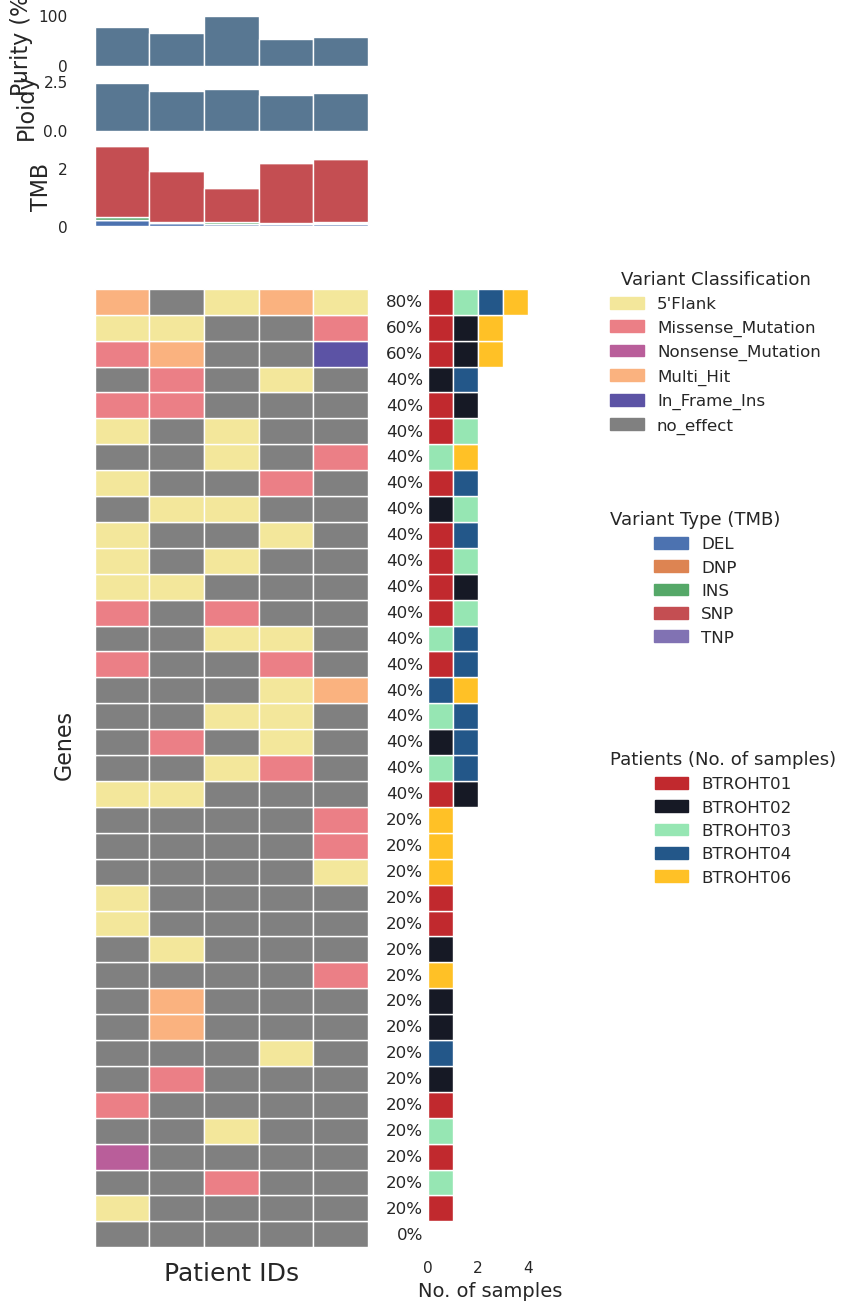

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# ========= Colors for oncoplot =========
effect_colors_updated = {
    "5'Flank": "#f3e79b",            # Light Yellow
    "Intron": "#fab27f",             # Peach
    "Missense_Mutation": "#eb7f86",  # Pink
    "Nonsense_Mutation": "#b95e9a",  # Lavender
    "Silent": "#5c53a5",             # Purple
    "Multi_Hit": "#fab27f",          # Same as Intron here
    "In_Frame_Ins": "#5c53a5",
    "no_effect": "gray",             # Gray for no effect
}

# ========= Colors per patient (right-side bar slices) =========
patient_colors = {
    "BTROHT03": "#96e6b3",
    "BTROHT04": "#235789",
    "BTROHT06": "#ffc126",
    "BTROHT01": "#c1292e",
    "BTROHT02": "#161925",
}

# ========= Selected genes =========
selected_genes = ["KMT2C", "TERT", "TP53", "IDH1"]

# ========= GBM driver genes list (from gbm_df) =========
gbm_driver_genes = list(gbm_df["SYMBOL"].unique())
gbm_driver_set = set(gbm_driver_genes)

# ========================
# 1) Select top 20 genes by Patient_Count
# ========================
top20_genes = (
    filtered_merged_df.groupby("Hugo_Symbol")["Patient"]
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# ========================
# 2) Combine: top20 + selected_genes + GBM driver genes
# ========================
combined_genes = sorted(set(selected_genes) | set(top20_genes) | set(gbm_driver_genes))

filtered_selected_genes_df = filtered_merged_df[
    filtered_merged_df["Hugo_Symbol"].isin(combined_genes)
].copy()

# ========= Multi-hit helper =========
def determine_effect(x):
    unique_effects = x.dropna().unique()
    if len(unique_effects) == 0:
        return "no_effect"
    if len(unique_effects) > 1:
        return "Multi_Hit"
    return unique_effects[0]

# 3) Predominant effect per gene per sample
effects_per_gene_sample_updated = (
    filtered_selected_genes_df.groupby(["Hugo_Symbol", "sample_name"])["Variant_Classification"]
    .apply(determine_effect)
    .unstack(fill_value="no_effect")
)

# 4) Count mutated samples per gene and sort
mutation_count_per_gene = (
    filtered_selected_genes_df.groupby("Hugo_Symbol")["sample_name"].nunique()
)
sorted_genes = mutation_count_per_gene.sort_values(ascending=False).index.tolist()

# Always show IDH1
if "IDH1" not in sorted_genes:
    sorted_genes.append("IDH1")

# 5) Build mutation matrix (genes x samples), flip for display
effect_matrix_updated = effects_per_gene_sample_updated.reindex(sorted_genes).fillna("no_effect")
effect_matrix_updated = effect_matrix_updated.iloc[::-1]

# ========================
# TMB per patient, colored by Variant_Type
# ========================
mutation_counts = (
    merged_df_TMB.groupby(["Patient", "Variant_Type"])
    .size()
    .reset_index(name="Count")
)
mutation_counts["TMB"] = mutation_counts["Count"] / 3000

tmb_pivot = mutation_counts.pivot_table(
    index="Patient", columns="Variant_Type", values="TMB", fill_value=0
)

# Align patient order with oncoplot samples
samples_order = list(effect_matrix_updated.columns)
tmb_pivot = tmb_pivot.reindex(samples_order).fillna(0)

# ========================
# Purity & ploidy from BT_pp_all
# ========================
custom_labels = [1, 2, 3, 4, 6]

BT_pp_ordered = (
    BT_pp_all.set_index("Patient")
    .reindex(custom_labels)
)

purity_vals = np.nan_to_num(BT_pp_ordered["cellularity"].values * 100, nan=0.0)
ploidy_vals = np.nan_to_num(BT_pp_ordered["ploidy"].values, nan=0.0)

# ========================
# Layout (2-column gridspec)
# ========================
n_samples = len(samples_order)
x_positions = np.arange(n_samples)

fig = plt.figure(figsize=(7.4, 16))  # slightly wider to accommodate legends

gs = fig.add_gridspec(
    4, 2,
    height_ratios=[0.25, 0.25, 0.4, 5],
    width_ratios=[2.0, 1],   # left plots, right sample-count bar
    hspace=0.05,
    wspace=0.15
)

# Bottom-left: oncoplot
ax_onco = fig.add_subplot(gs[3, 0])

# Top panels share x with oncoplot
ax_purity = fig.add_subplot(gs[0, 0], sharex=ax_onco)
ax_ploidy = fig.add_subplot(gs[1, 0], sharex=ax_onco)
ax_tmb    = fig.add_subplot(gs[2, 0], sharex=ax_onco)

# Bottom-right: sample-count bar
ax_right = fig.add_subplot(gs[3, 1], sharey=ax_onco)

# -------- Purity --------
ax_purity.bar(x_positions, purity_vals, width=1, color="#587792")
ax_purity.set_ylabel("Purity (%)", fontsize=16)
ax_purity.set_ylim(0, 100)
ax_purity.tick_params(axis="x", bottom=False, labelbottom=False)
for spine in ax_purity.spines.values():
    spine.set_visible(False)

# -------- Ploidy --------
ax_ploidy.bar(x_positions, ploidy_vals, width=1, color="#587792")
ax_ploidy.set_ylabel("Ploidy", fontsize=16)
ax_ploidy.tick_params(axis="x", bottom=False, labelbottom=False)
for spine in ax_ploidy.spines.values():
    spine.set_visible(False)

# -------- TMB (stacked) --------
bottom_vals = np.zeros(n_samples)
tmb_bar_colors = {}  # store actual colors used so the legend matches perfectly

for variant in tmb_pivot.columns:
    bars = ax_tmb.bar(
        x_positions,
        tmb_pivot[variant].values,
        bottom=bottom_vals,
        width=1,
        label=variant
    )
    # record the facecolor actually used by matplotlib
    tmb_bar_colors[variant] = bars[0].get_facecolor()
    bottom_vals += tmb_pivot[variant].values

ax_tmb.set_ylabel("TMB", fontsize=16)
ax_tmb.tick_params(axis="x", bottom=False, labelbottom=False)
for spine in ax_tmb.spines.values():
    spine.set_visible(False)

# -------- Oncoplot --------
for i, gene in enumerate(effect_matrix_updated.index):
    for j, sample in enumerate(effect_matrix_updated.columns):
        effect_type = effect_matrix_updated.loc[gene, sample]
        ax_onco.bar(
            j, 1,
            bottom=i,
            color=effect_colors_updated.get(effect_type, "gray"),
            width=1
        )

ax_onco.set_ylabel("Genes", fontsize=16)
ax_onco.set_xlabel("Patient IDs", fontsize=18, labelpad=10)
ax_onco.set_title("", fontsize=16)

ax_onco.set_yticks(np.arange(len(effect_matrix_updated.index)) + 0.5)
ax_onco.set_yticklabels(effect_matrix_updated.index, fontsize=18)

# Highlight driver genes + TERT
for label in ax_onco.get_yticklabels():
    gene = label.get_text()
    if gene in gbm_driver_set or gene == "TERT":
        label.set_color("red")

tick_positions = x_positions + 0.5
ax_onco.set_xticks(tick_positions)

if len(custom_labels) == n_samples:
    ax_onco.set_xticklabels(custom_labels, rotation=0, ha="right", fontsize=18)
else:
    ax_onco.set_xticklabels(samples_order, rotation=90, ha="right", fontsize=10)

for spine in ax_onco.spines.values():
    spine.set_visible(False)

# -------- Right panel: No. of samples / % per gene --------
mutated_bool = (effect_matrix_updated != "no_effect")
n_genes, _ = mutated_bool.shape
gene_sample_counts = mutated_bool.sum(axis=1)
y_positions = np.arange(n_genes) + 0.5

for row_i, gene in enumerate(effect_matrix_updated.index):
    left = 0
    for col_j, patient in enumerate(samples_order):
        if mutated_bool.iloc[row_i, col_j]:
            ax_right.barh(
                y_positions[row_i],
                1,
                left=left,
                color=patient_colors.get(patient, "lightgray"),
                height=1
            )
            left += 1

    pct = (gene_sample_counts.iloc[row_i] / n_samples) * 100
    ax_right.text(
        -0.2, y_positions[row_i],
        f"{pct:.0f}%",
        va="center", ha="right",
        fontsize=12
    )

ax_right.set_xlim(-0.5, n_samples + 0.5)
ax_right.set_xlabel("No. of samples", fontsize=14)
ax_right.set_yticks([])
ax_right.tick_params(axis="y", left=False)
for spine in ax_right.spines.values():
    spine.set_visible(False)

for ax in (ax_purity, ax_ploidy, ax_tmb):
    ax.set_xticks([])

# ========================
# THREE VERTICAL LEGENDS (like your screenshot)
# ========================

# 1) Variant Classification
variant_class_order = ["5'Flank", "Missense_Mutation", "Nonsense_Mutation", "Multi_Hit", "In_Frame_Ins", "no_effect"]
variant_class_handles = [
    Patch(color=effect_colors_updated[k], label=k) for k in variant_class_order
]

fig.legend(
    handles=variant_class_handles,
    title="Variant Classification",
    loc="upper left",
    bbox_to_anchor=(0.82, 0.73),
    frameon=False,
    fontsize=12,
    title_fontsize=13
)

# 2) Variant Type (TMB)
tmb_handles = [Patch(color=tmb_bar_colors[v], label=v) for v in tmb_pivot.columns]

fig.legend(
    handles=tmb_handles,
    title="Variant Type (TMB)",
    loc="upper left",
    bbox_to_anchor=(0.82, 0.58),
    frameon=False,
    fontsize=12,
    title_fontsize=13
)

# 3) Patients (No. of samples)
patient_handles = [
    Patch(color=patient_colors[p], label=p)
    for p in samples_order
    if p in patient_colors
]

fig.legend(
    handles=patient_handles,
    title="Patients (No. of samples)",
    loc="upper left",
    bbox_to_anchor=(0.82, 0.43),
    frameon=False,
    fontsize=12,
    title_fontsize=13
)

# Make room for legends on the right
plt.subplots_adjust(right=0.78)

plt.savefig("ALL_FIGURES_THESIS/oncoplotmain.png", dpi=300, bbox_inches="tight")
plt.show()


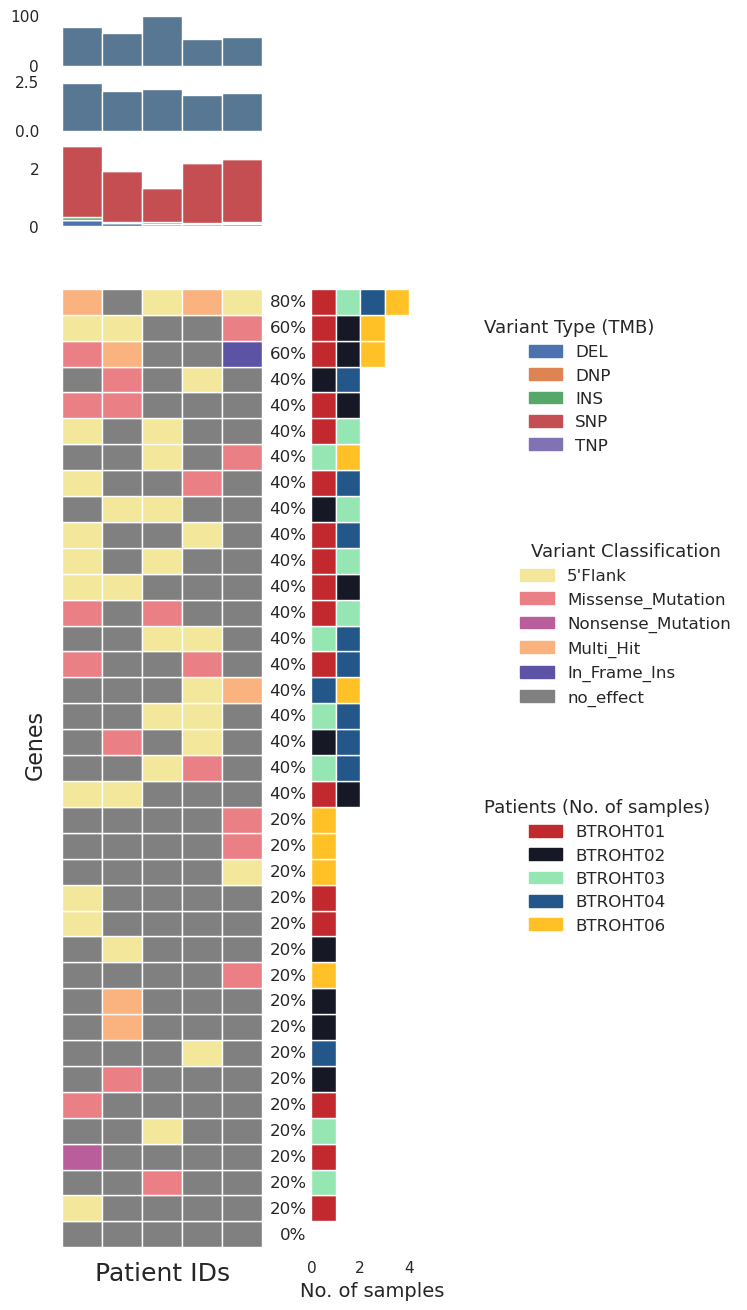

In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable

# ========= Colors for oncoplot =========
effect_colors_updated = {
    "5'Flank": "#f3e79b",            # Light Yellow
    "Intron": "#fab27f",             # Peach
    "Missense_Mutation": "#eb7f86",  # Pink
    "Nonsense_Mutation": "#b95e9a",  # Lavender
    "Silent": "#5c53a5",             # Purple
    "Multi_Hit": "#fab27f",          # Same as Intron here
    "In_Frame_Ins": "#5c53a5",
    "no_effect": "gray",             # Gray for no effect
}

# ========= Colors per patient (right-side bar slices) =========
patient_colors = {
    "BTROHT03": "#96e6b3",
    "BTROHT04": "#235789",
    "BTROHT06": "#ffc126",
    "BTROHT01": "#c1292e",
    "BTROHT02": "#161925",
}

# ========= Selected genes =========
selected_genes = ["KMT2C", "TERT", "TP53", "IDH1"]

# ========= GBM driver genes list (from gbm_df) =========
gbm_driver_genes = list(gbm_df["SYMBOL"].unique())
gbm_driver_set = set(gbm_driver_genes)

# ========================
# 1) Select top 20 genes by Patient_Count
# ========================
top20_genes = (
    filtered_merged_df.groupby("Hugo_Symbol")["Patient"]
    .nunique()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# ========================
# 2) Combine: top20 + selected_genes + GBM driver genes
# ========================
combined_genes = sorted(set(selected_genes) | set(top20_genes) | set(gbm_driver_genes))

filtered_selected_genes_df = filtered_merged_df[
    filtered_merged_df["Hugo_Symbol"].isin(combined_genes)
].copy()

# ========= Multi-hit helper =========
def determine_effect(x):
    unique_effects = x.dropna().unique()
    if len(unique_effects) == 0:
        return "no_effect"
    if len(unique_effects) > 1:
        return "Multi_Hit"
    return unique_effects[0]

# 3) Predominant effect per gene per sample
effects_per_gene_sample_updated = (
    filtered_selected_genes_df.groupby(["Hugo_Symbol", "sample_name"])["Variant_Classification"]
    .apply(determine_effect)
    .unstack(fill_value="no_effect")
)

# 4) Count mutated samples per gene and sort
mutation_count_per_gene = (
    filtered_selected_genes_df.groupby("Hugo_Symbol")["sample_name"].nunique()
)
sorted_genes = mutation_count_per_gene.sort_values(ascending=False).index.tolist()

# Always show IDH1
if "IDH1" not in sorted_genes:
    sorted_genes.append("IDH1")

# 5) Build mutation matrix (genes x samples), flip for display
effect_matrix_updated = effects_per_gene_sample_updated.reindex(sorted_genes).fillna("no_effect")
effect_matrix_updated = effect_matrix_updated.iloc[::-1]

# ========================
# TMB per patient, colored by Variant_Type
# ========================
mutation_counts = (
    merged_df_TMB.groupby(["Patient", "Variant_Type"])
    .size()
    .reset_index(name="Count")
)
mutation_counts["TMB"] = mutation_counts["Count"] / 3000

tmb_pivot = mutation_counts.pivot_table(
    index="Patient", columns="Variant_Type", values="TMB", fill_value=0
)

# Align patient order with oncoplot samples
samples_order = list(effect_matrix_updated.columns)
tmb_pivot = tmb_pivot.reindex(samples_order).fillna(0)

# ========================
# Purity & ploidy from BT_pp_all
# ========================
custom_labels = [1, 2, 3, 4, 6]

BT_pp_ordered = (
    BT_pp_all.set_index("Patient")
    .reindex(custom_labels)
)

purity_vals = np.nan_to_num(BT_pp_ordered["cellularity"].values * 100, nan=0.0)
ploidy_vals = np.nan_to_num(BT_pp_ordered["ploidy"].values, nan=0.0)

# ========================
# Layout (2-column gridspec)
# ========================
n_samples = len(samples_order)
x_positions = np.arange(n_samples)

fig = plt.figure(figsize=(6, 16))  # slightly wider to accommodate legends

# Adjust the width_ratios to make the left plots narrower
gs = fig.add_gridspec(
    4, 2,
    height_ratios=[0.25, 0.25, 0.4, 5],  # Keeps the heights as before
    width_ratios=[1.5, 1],   # Left plot is smaller, right plot (sample-count bar) is bigger
    hspace=0.05,
    wspace=0.15
)

# Bottom-left: oncoplot
ax_onco = fig.add_subplot(gs[3, 0])

# Top panels share x with oncoplot
ax_purity = fig.add_subplot(gs[0, 0], sharex=ax_onco)
ax_ploidy = fig.add_subplot(gs[1, 0], sharex=ax_onco)
ax_tmb    = fig.add_subplot(gs[2, 0], sharex=ax_onco)

# Bottom-right: sample-count bar
ax_right = fig.add_subplot(gs[3, 1], sharey=ax_onco)

# -------- Purity --------
ax_purity.bar(x_positions, purity_vals, width=1, color="#587792")
ax_purity.set_ylabel("", fontsize=16)
ax_purity.set_ylim(0, 100)
ax_purity.tick_params(axis="x", bottom=False, labelbottom=False)
for spine in ax_purity.spines.values():
    spine.set_visible(False)

# -------- Ploidy --------
ax_ploidy.bar(x_positions, ploidy_vals, width=1, color="#587792")
ax_ploidy.set_ylabel("", fontsize=16)
ax_ploidy.tick_params(axis="x", bottom=False, labelbottom=False)
for spine in ax_ploidy.spines.values():
    spine.set_visible(False)

# -------- TMB (stacked) --------
bottom_vals = np.zeros(n_samples)
tmb_bar_colors = {}  # store actual colors used so the legend matches perfectly

for variant in tmb_pivot.columns:
    bars = ax_tmb.bar(
        x_positions,
        tmb_pivot[variant].values,
        bottom=bottom_vals,
        width=1,
        label=variant
    )
    # record the facecolor actually used by matplotlib
    tmb_bar_colors[variant] = bars[0].get_facecolor()
    bottom_vals += tmb_pivot[variant].values

ax_tmb.set_ylabel("", fontsize=16)
ax_tmb.tick_params(axis="x", bottom=False, labelbottom=False)
for spine in ax_tmb.spines.values():
    spine.set_visible(False)

# -------- Bottom panel: Oncoplot --------
for i, gene in enumerate(effect_matrix_updated.index):
    for j, sample in enumerate(effect_matrix_updated.columns):
        effect_type = effect_matrix_updated.loc[gene, sample]
        ax_onco.bar(
            j, 1,
            bottom=i,
            color=effect_colors_updated.get(effect_type, "gray"),
            width=1
        )

# Set gene names on the left of the oncoplot
ax_onco.set_ylabel("Genes", fontsize=16)
ax_onco.set_xlabel("Patient IDs", fontsize=18, labelpad=10)
ax_onco.set_title("", fontsize=16)

ax_onco.set_yticks(np.arange(len(effect_matrix_updated.index)) + 0.5)
ax_onco.set_yticklabels(effect_matrix_updated.index, fontsize=14)

# Highlight driver genes + TERT in red
for label in ax_onco.get_yticklabels():
    gene = label.get_text()
    if gene in gbm_driver_set or gene == "TERT":
        label.set_color("red")

tick_positions = x_positions + 0.5
ax_onco.set_xticks(tick_positions)

if len(custom_labels) == n_samples:
    ax_onco.set_xticklabels(custom_labels, rotation=0, ha="right", fontsize=14)
else:
    # Fallback: show actual sample names
    ax_onco.set_xticklabels(samples_order, rotation=90, ha="right", fontsize=10)

for spine in ax_onco.spines.values():
    spine.set_visible(False)

# -------- Right panel: No. of samples / % per gene --------
mutated_bool = (effect_matrix_updated != "no_effect")
n_genes, _ = mutated_bool.shape
gene_sample_counts = mutated_bool.sum(axis=1)
y_positions = np.arange(n_genes) + 0.5

for row_i, gene in enumerate(effect_matrix_updated.index):
    left = 0
    for col_j, patient in enumerate(samples_order):
        if mutated_bool.iloc[row_i, col_j]:
            ax_right.barh(
                y_positions[row_i],
                1,
                left=left,
                color=patient_colors.get(patient, "lightgray"),
                height=1
            )
            left += 1

    pct = (gene_sample_counts.iloc[row_i] / n_samples) * 100
    ax_right.text(
        -0.2, y_positions[row_i],
        f"{pct:.0f}%",
        va="center", ha="right",
        fontsize=12
    )

ax_right.set_xlim(-0.5, n_samples + 0.5)
ax_right.set_xlabel("No. of samples", fontsize=14)
ax_right.set_yticks([])
ax_right.tick_params(axis="y", left=False)
for spine in ax_right.spines.values():
    spine.set_visible(False)

for ax in (ax_purity, ax_ploidy, ax_tmb):
    ax.set_xticks([])

# ========================
# LEGENDS (to match image) 
# ========================

# 1) Variant Classification
variant_class_order = ["5'Flank", "Missense_Mutation", "Nonsense_Mutation", "Multi_Hit", "In_Frame_Ins", "no_effect"]
variant_class_handles = [
    Patch(color=effect_colors_updated[k], label=k) for k in variant_class_order
]

fig.legend(
    handles=variant_class_handles,
    title="Variant Classification",
    loc="upper left",
    bbox_to_anchor=(0.88, 0.56),
    frameon=False,
    fontsize=12,
    title_fontsize=13
)

# 2) Variant Type (TMB)
tmb_handles = [Patch(color=tmb_bar_colors[v], label=v) for v in tmb_pivot.columns]

fig.legend(
    handles=tmb_handles,
    title="Variant Type (TMB)",
    loc="upper left",
    bbox_to_anchor=(0.82, 0.70),
    frameon=False,
    fontsize=12,
    title_fontsize=13
)

# 3) Patients (No. of samples)
patient_handles = [
    Patch(color=patient_colors[p], label=p)
    for p in samples_order
    if p in patient_colors
]

fig.legend(
    handles=patient_handles,
    title="Patients (No. of samples)",
    loc="upper left",
    bbox_to_anchor=(0.82, 0.40),
    frameon=False,
    fontsize=12,
    title_fontsize=13
)

# Make room for legends on the right
plt.subplots_adjust(right=0.78)

plt.savefig("ALL_FIGURES_THESIS/oncoplotmain.png", dpi=300, bbox_inches="tight")
plt.show()
